# Wattpad *hot* stories gathered from the public API from Oct. 6 and Oct. 13

### *Hi Dago!* Here is some basic analysis for the first week of data collection. I'm not quite sure that we are ready to start cross referencing this stuff with other social media without a bit of preliminary analysis to determine the way the "hot" stories system works. This document picks apart the first week of data a little bit, and I'm hoping from here we can refine our collection/cross referncing strategy a bit and put together a good system. The end of the document contains my thoughts on how we should proceed.

#### Feel free to ignore these blocks of code. When there is important information I will add some text explaining it.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
def read_json(jsonfile):
    import json
    hot_stories = []
    with open(jsonfile, 'r') as f:
        for line in f:
            story = json.loads(line)
            hot_stories.append(story)
    return hot_stories


hot_stories = read_json('merged_hot_oct_13.json')
story_ids = {story['id'] for story in hot_stories}
hot_stories = pd.DataFrame(hot_stories)

Over the week, we have this many unique stories:

In [3]:
len(story_ids)

2631

This means that the hot stories do change, but many remain the same, at least over a realitively short amount of time

### Top "Hot" Stories

The following table shows the top 25 stories for this week based on 'readCount' statistic:

In [4]:
stories_by_read_count = hot_stories.sort_values(by='readCount', ascending=False)[['id', 'readCount', 'commentCount', 'title', 'user', 'voteCount']]
stories_by_read_count = stories_by_read_count.drop_duplicates(subset='id')
stories_by_read_count.head(25)

id  readCount  commentCount  \
4498   7509667   16355749         46600   
4512    756934    9903670         12312   
6084    704962    9137518          7056   
4499  16618124    6872079         14166   
2116    174831    2352322           984   
4505   6644139    1332718           841   
4529  14077094    1303953         10747   
6166   4268770     948072          3271   
4530  17406875     856653          3975   
4503  12050237     779835          1248   
4385   4337352     778561          2413   
4630   9134608     748668          2609   
4501  54888909     739396           757   
4510  48112361     677593           372   
4500  19712816     639521         18480   
4532  11233381     487505           257   
4528  13457281     461565           967   
741    1036569     444453           635   
4514   8325491     386213           644   
4607  10991207     373713           529   
782     755741     369501           336   
4543    703750     346768           419   
5799   2076507     333941           401   
4610   9322844     311378           969   
4509  26504072     295909           163   

                                                  title                user  \
4498                                   5SOS Preferences        alexand_rawr   
4512                         unexpected [MAJOR EDITING]            Supersox   
6084                  Hush, Howl (Complete and Editing)      MyLovelyWriter   
4499                                Escorting the Brute     iwillluv1d4ever   
2116                          Going Through the Motions             TNEvans   
4505                Black Heart<gxg>(GirlxGirl lesbian)      SanEmLexRiss14   
4529  In Love With My Tutor? (A Matt Espinosa/o2l Fa...       AlienEspinosa   
6166  We Are Who We Are // Little Mix + Harry Styles...   _nononononononono   
4530                                          Hood Girl         KingofThugs   
4503                                   Hadar #Watty2014           RevyRogue   
4385  Why Him ? Why My Teacher ? (Student/Teacher) (...            Urbannnn   
4630                       Arranged Marriage with Luhan      TheRedEyedWolf   
4501                          Hugot/Quotes/Patama For U      jannakimbyun12   
4510                              My teacher My husband           NadienSHR   
4500  She has a Secret ~ NaLu (BOOK 1 & 2) [2ND plac...     parkjiminswings   
4532                                     R5 Preferences        KimmyPolanco   
4528                               Projek Bantah Kahwin              Mina94   
741       My Mate's rejection, but another's perfection        lily_summers   
4514                                Kiss me (girlxgirl)        love_shannon   
4607                              Janoskian Preferences          missfarahx   
782                                     Innocent Desire             DhistiD   
4543   Crystal Butterflys (sequel to Change is a given)    nativeprincess32   
5799  Stuck In The Dark (One Direction Fanfic) ****C...           Marslstar   
4610                    In Love with That Guy [EXO Tao]         deathmaiden   
4509                        ICE QUEEN (Lesbian Stories)  WriteMyHeartForYou   

      voteCount  
4498     167130  
4512      52449  
6084     109460  
4499     153273  
2116       6094  
4505      29851  
4529      26346  
6166      14017  
4530      30736  
4503      36738  
4385      21902  
4630      13977  
4501      18708  
4510      36604  
4500      30974  
4532       6731  
4528      14717  
741        7628  
4514       9377  
4607       4877  
782        2929  
4543       5429  
5799       2793  
4610       7342  
4509       6694

The overall distribution of the read count over the aggregated data. As you can see, the number of reads drops off swiftly as the stories go down in the ranking:

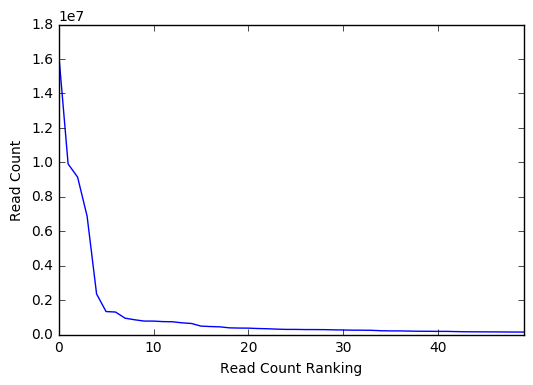

In [5]:
pd.Series(stories_by_read_count['readCount'].values)[0:50].plot()
plt.ylabel('Read Count')
plt.xlabel('Read Count Ranking')

The following table shows the top 25 stories for this week based on 'voteCount' statistic:

In [6]:
stories_by_vote_count = hot_stories.sort_values(by='voteCount', ascending=False)[['id', 'readCount', 'commentCount', 'title', 'user', 'voteCount']]
stories_by_vote_count = stories_by_vote_count.drop_duplicates(subset='id')
stories_by_vote_count.head(25)

id  readCount  commentCount  \
4498   7509667   16355749         46600   
4499  16618124    6872079         14166   
6084    704962    9137518          7056   
6111    756934    9903018         12312   
3004  12050237     779328          1248   
4510  48112361     677593           372   
4500  19712816     639521         18480   
4530  17406875     856653          3975   
4505   6644139    1332718           841   
4529  14077094    1303953         10747   
4385   4337352     778561          2413   
4863  69933122     186418          2625   
4501  54888909     739396           757   
2893  27006005     150672          5303   
4528  13457281     461565           967   
27    28701670     116750          3666   
6166   4268770     948072          3271   
4630   9134608     748668          2609   
6141   8805930     286780           759   
3015   8325491     386148           644   
3038  10414535     282484          1291   
3035  15859586     197095          1110   
6212  22997270     110872           421   
1519   3796898     295210           512   
4647  16180182     181694          3062   

                                                  title               user  \
4498                                   5SOS Preferences       alexand_rawr   
4499                                Escorting the Brute    iwillluv1d4ever   
6084                  Hush, Howl (Complete and Editing)     MyLovelyWriter   
6111                         unexpected [MAJOR EDITING]           Supersox   
3004                                   Hadar #Watty2014          RevyRogue   
4510                              My teacher My husband          NadienSHR   
4500  She has a Secret ~ NaLu (BOOK 1 & 2) [2ND plac...    parkjiminswings   
4530                                          Hood Girl        KingofThugs   
4505                Black Heart<gxg>(GirlxGirl lesbian)     SanEmLexRiss14   
4529  In Love With My Tutor? (A Matt Espinosa/o2l Fa...      AlienEspinosa   
4385  Why Him ? Why My Teacher ? (Student/Teacher) (...           Urbannnn   
4863                                          BTS FUNNY          _XXXIXXX_   
4501                          Hugot/Quotes/Patama For U     jannakimbyun12   
2893                 Things only a Potterhead would get        CatRose0625   
4528                               Projek Bantah Kahwin             Mina94   
27                                       Otaku Problems       Nutella-Chan   
6166  We Are Who We Are // Little Mix + Harry Styles...  _nononononononono   
4630                       Arranged Marriage with Luhan     TheRedEyedWolf   
6141                         Rejection is not an option           1Chelsea   
3015                                Kiss me (girlxgirl)       love_shannon   
3038                              Coach Ishot (ManxBoy)          AlstonN__   
3035               The Sounds of Flames ~ A Nalu Fanfic         rubyrosemc   
6212                              Will Never Let You Go      AntheaFeather   
1519                                          I'm Back!          weetwifan   
4647                                               Lips         Flowerboys   

      voteCount  
4498     167130  
4499     153273  
6084     109460  
6111      52449  
3004      36738  
4510      36604  
4500      30974  
4530      30736  
4505      29851  
4529      26346  
4385      21902  
4863      19407  
4501      18708  
2893      15573  
4528      14717  
27        14034  
6166      14017  
4630      13977  
6141      10556  
3015       9377  
3038       9217  
3035       7896  
6212       7880  
1519       7738  
4647       7700

The overall distribution of the vote count over the aggregated data. As you can see, the number of votes drops off swiftly as the stories go down in the ranking, but not quite as quickly as by read count:

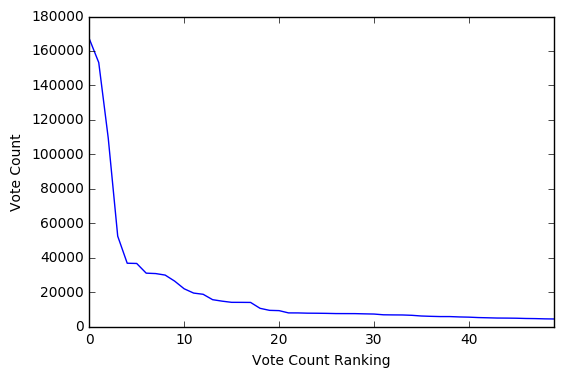

In [7]:
pd.Series(stories_by_vote_count['voteCount'].values)[0:50].plot()
plt.ylabel('Vote Count')
plt.xlabel('Vote Count Ranking')

The following table shows the top 25 stories for this week based on 'commentCount' statistic:

In [8]:
stories_by_comment_count = hot_stories.sort_values(by='commentCount', ascending=False)[['id', 'readCount', 'commentCount', 'title', 'user', 'voteCount']]
stories_by_comment_count = stories_by_comment_count.drop_duplicates(subset='id')
stories_by_comment_count.head(25)

id  readCount  commentCount  \
4498   7509667   16355749         46600   
4500  19712816     639521         18480   
4499  16618124    6872079         14166   
4512    756934    9903670         12312   
4529  14077094    1303953         10747   
6084    704962    9137518          7056   
2505  64344991       1659          5634   
1052  39030108       4369          5461   
2893  27006005     150672          5303   
4513  27344557     147001          4529   
3031  17406875     856450          3975   
6030  28701670     116723          3666   
6166   4268770     948072          3271   
4606  18709442     250085          3225   
1953  19303977     126847          3190   
4507  28687434     126126          3121   
3148  16180182     181660          3062   
3202   9877357     152259          2919   
4549  14355446     167560          2765   
4863  69933122     186418          2625   
3131   9134608     748638          2609   
81    15705071      58823          2575   
4385   4337352     778561          2413   
6187  57773217     122628          2340   
4547  41668740     135884          2229   

                                                  title               user  \
4498                                   5SOS Preferences       alexand_rawr   
4500  She has a Secret ~ NaLu (BOOK 1 & 2) [2ND plac...    parkjiminswings   
4499                                Escorting the Brute    iwillluv1d4ever   
4512                         unexpected [MAJOR EDITING]           Supersox   
4529  In Love With My Tutor? (A Matt Espinosa/o2l Fa...      AlienEspinosa   
6084                  Hush, Howl (Complete and Editing)     MyLovelyWriter   
2505                                     MLP EG RP book        meganbeth24   
1052                                    Pokémon High RP             -Kory-   
2893                 Things only a Potterhead would get        CatRose0625   
4513         Forever With You (Italy x Reader x Romano)  RawR_Ima_Dinozaur   
3031                                          Hood Girl        KingofThugs   
6030                                     Otaku Problems       Nutella-Chan   
6166  We Are Who We Are // Little Mix + Harry Styles...  _nononononononono   
4606                    Little Miss Liar (Jack Johnson)        Maemae20549   
1953                                  Tell Me Im Frozen      UnderDarkness   
4507        In love with you ( Jacksepticeye x Reader )          kitiliisu   
3148                                               Lips         Flowerboys   
3202                        Sebastian x Reader x Claude      PandaCuprcake   
4549                  Merged Worlds  (Book 1) [Editing]   Flaming-Darkness   
4863                                          BTS FUNNY          _XXXIXXX_   
3131                       Arranged Marriage with Luhan     TheRedEyedWolf   
81                                No matter what (Phan)       MintyTeaMint   
4385  Why Him ? Why My Teacher ? (Student/Teacher) (...           Urbannnn   
6187                    Camren Is Having A Baby (CIHAB)  candiesAndharmony   
4547                                      Levi X Reader        amberwolf89   

      voteCount  
4498     167130  
4500      30974  
4499     153273  
4512      52449  
4529      26346  
6084     109460  
2505         38  
1052         21  
2893      15573  
4513       6495  
3031      30727  
6030      14034  
6166      14017  
4606       7508  
1953       5549  
4507       3336  
3148       7700  
3202       4365  
4549       7489  
4863      19407  
3131      13977  
81         2765  
4385      21902  
6187       4653  
4547       5905

The overall distribution of the comment count over the aggregated data. Again, the number of comments drops off swiftly as the stories go down in the ranking:

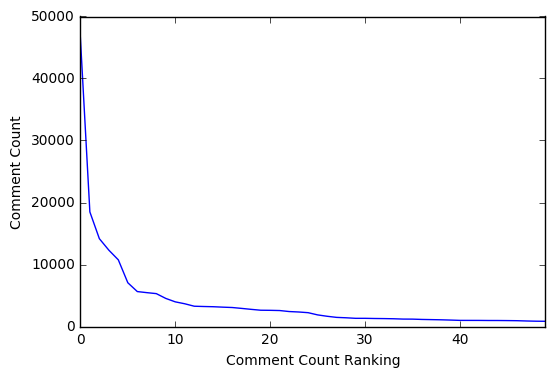

In [9]:
pd.Series(stories_by_comment_count['commentCount'].values)[0:50].plot()
plt.ylabel('Comment Count')
plt.xlabel('Comment Count Ranking')

We also se here that the same story appears over and over in the data set, with its vital statistics increasing, until they presumably plateau. For example, we see the  5SOS Preferences was consistently on the hot list:

In [12]:
hot_stories[hot_stories['id'] == 7509667][['id', 'readCount', 'commentCount', 'title', 'user', 'voteCount']]

id  readCount  commentCount             title          user  \
0     7509667   16351528         46587  5SOS Preferences  alexand_rawr   
1498  7509667   16352633         46594  5SOS Preferences  alexand_rawr   
2999  7509667   16354892         46595  5SOS Preferences  alexand_rawr   
4498  7509667   16355749         46600  5SOS Preferences  alexand_rawr   
5996  7509667   16347202         46573  5SOS Preferences  alexand_rawr   

      voteCount  
0        167006  
1498     167013  
2999     167120  
4498     167130  
5996     166974

### What does it all mean...?

...well, we don't really know, but don't freak. We see the following:

* Certain stories dominate, by far, in terms of read, vote, and comment count. There are a few stories at the top, and after that they fall off quickly

* Stories seem to stick on the hot list, at least during a short period

* The hot list is updated frequently enough, at least daily, that we can detect increased activity around stories as well as activity that has reached a plateau.


In order to better understand what is going on here, and if it really has any relationship to other social media activities, I would propose the following data collection/analysis plan:

* Each day, we download the hot list

* Every Monday, starting next week, we perform a basic analysis to identify the top 10 stories (like I have done here in this document) *on that Monday*

* After the stories have been identified, we locate other social media accounts (Twitter, Facebook, etc.) associated with the authors of the top 10 stories. Each day, we run a collection on relevant data from these sites.
 
* On the following Monday, we reasses. If the top stories (and authors) have changed, we begin collecting social media artifacts based on this new information.

* Then, for analysis, we can monitor how the top stories authors social media activities and if this can be correlated with comments, votes, reads etc.